In [16]:
from sklearn.neural_network import MLPClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import pandas as pd 
from sklearn import preprocessing, metrics 
from sklearn.metrics import classification_report, confusion_matrix , accuracy_score 
from sklearn.model_selection import StratifiedKFold, train_test_split, cross_val_score 
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import numpy as np

In [17]:
df=pd.read_csv('ColumnAB.csv')
x=df.drop('Label',axis=1)
y=df.Label
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=4)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

scale = MinMaxScaler()
X_tr = scale.fit_transform(X_train)
X_te = scale.transform(X_test)

In [18]:
#instantiating ML models
mlp = MLPClassifier(hidden_layer_sizes=(150,100,50), max_iter=300,activation = 'relu'
                    ,solver='adam',random_state=23)
svm = SVC(kernel='linear')
knn = KNeighborsClassifier(n_neighbors=3)
gnb = GaussianNB()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier()
lr = LogisticRegression()
rf = RandomForestClassifier(n_estimators=1000)

#training models
mlp.fit(X_train, y_train)
svm.fit(X_train, y_train)
gnb.fit(X_train, y_train)
mnb.fit(X_tr, y_train)
dtc.fit(X_train, y_train)
lr.fit(X_train, y_train)
rf.fit(X_train, y_train)
knn.fit(X_train, y_train)

#predictions
a = mlp.predict(X_test)
b = svm.predict(X_test)
c = gnb.predict(X_test)
d = mnb.predict(X_test)
e = dtc.predict(X_test)
f = lr.predict(X_test)
g = rf.predict(X_test)
h = knn.predict(X_test)

#Metrics for mlp

print("Metrics for MLP")
print("accuracy", accuracy_score(y_test,a))

print("Precision", metrics.precision_score(y_test,a))

print("Recall", metrics.recall_score(y_test,a))
# cv=10 represents the StratifiedKFold with 10 folds
#
scores = cross_val_score(mlp, X=X_train, y=y_train, cv=10, n_jobs=1)
 
print('Cross Validation accuracy scores: %s' % scores)
 
print('Cross Validation accuracy: %.3f +/- %.3f' % (np.mean(scores),np.std(scores)))

      
print("Metrics for SVM")
print("accuracy", accuracy_score(y_test,b))

print("Precision", metrics.precision_score(y_test,b))

print("Recall", metrics.recall_score(y_test,b))
# cv=10 represents the StratifiedKFold with 10 folds
#
scores = cross_val_score(svm, X=X_train, y=y_train, cv=10, n_jobs=1)
 
print('Cross Validation accuracy scores: %s' % scores)
 
print('Cross Validation accuracy: %.3f +/- %.3f' % (np.mean(scores),np.std(scores)))

    




Metrics for MLP
accuracy 0.8686131386861314
Precision 0.828125
Recall 0.8833333333333333
Cross Validation accuracy scores: [0.90625    0.90625    0.78125    0.9375     0.84375    0.84375
 0.84375    0.9375     0.90625    0.83870968]
Cross Validation accuracy: 0.874 +/- 0.049
Metrics for SVM
accuracy 0.8686131386861314
Precision 0.85
Recall 0.85
Cross Validation accuracy scores: [0.84375    0.875      0.625      0.8125     0.84375    0.78125
 0.75       0.6875     0.875      0.83870968]
Cross Validation accuracy: 0.793 +/- 0.079


In [19]:
print("Metrics for GNB")
print("accuracy", accuracy_score(y_test,c))

print("Precision", metrics.precision_score(y_test,c))

print("Recall", metrics.recall_score(y_test,c))
# cv=10 represents the StratifiedKFold with 10 folds
#
scores = cross_val_score(gnb, X=X_train, y=y_train, cv=10, n_jobs=1)
 
print('Cross Validation accuracy scores: %s' % scores)
 
print('Cross Validation accuracy: %.3f +/- %.3f' % (np.mean(scores),np.std(scores)))

Metrics for GNB
accuracy 0.8029197080291971
Precision 0.8837209302325582
Recall 0.6333333333333333
Cross Validation accuracy scores: [0.75       0.6875     0.65625    0.71875    0.8125     0.71875
 0.84375    0.78125    0.8125     0.77419355]
Cross Validation accuracy: 0.756 +/- 0.057


In [20]:
print("Metrics for MNB")
print("accuracy", accuracy_score(y_test,d))

print("Precision", metrics.precision_score(y_test,d))

print("Recall", metrics.recall_score(y_test,d))
# cv=10 represents the StratifiedKFold with 10 folds
#
scores = cross_val_score(mnb, X=X_tr, y=y_train, cv=10, n_jobs=1)
 
print('Cross Validation accuracy scores: %s' % scores)
 
print('Cross Validation accuracy: %.3f +/- %.3f' % (np.mean(scores),np.std(scores)))

Metrics for MNB
accuracy 0.7956204379562044
Precision 0.8478260869565217
Recall 0.65
Cross Validation accuracy scores: [0.75       0.6875     0.6875     0.71875    0.78125    0.71875
 0.78125    0.78125    0.8125     0.80645161]
Cross Validation accuracy: 0.753 +/- 0.044


In [21]:
print("Metrics for DecisionTree")
print("accuracy", accuracy_score(y_test,e))

print("Precision", metrics.precision_score(y_test,e))

print("Recall", metrics.recall_score(y_test,e))
# cv=10 represents the StratifiedKFold with 10 folds
#
scores = cross_val_score(dtc, X=X_train, y=y_train, cv=10, n_jobs=1)
 
print('Cross Validation accuracy scores: %s' % scores)
 
print('Cross Validation accuracy: %.3f +/- %.3f' % (np.mean(scores),np.std(scores)))

Metrics for DecisionTree
accuracy 0.8467153284671532
Precision 0.7910447761194029
Recall 0.8833333333333333
Cross Validation accuracy scores: [0.78125    0.84375    0.71875    0.71875    0.78125    0.65625
 0.84375    0.71875    0.90625    0.74193548]
Cross Validation accuracy: 0.771 +/- 0.072


In [22]:
print("Metrics for Logistic Regression")
print("accuracy", accuracy_score(y_test,f))

print("Precision", metrics.precision_score(y_test,f))

print("Recall", metrics.recall_score(y_test,f))
# cv=10 represents the StratifiedKFold with 10 folds
#
scores = cross_val_score(lr, X=X_train, y=y_train, cv=10, n_jobs=1)
 
print('Cross Validation accuracy scores: %s' % scores)
 
print('Cross Validation accuracy: %.3f +/- %.3f' % (np.mean(scores),np.std(scores)))

Metrics for Logistic Regression
accuracy 0.8613138686131386
Precision 0.8253968253968254
Recall 0.8666666666666667
Cross Validation accuracy scores: [0.78125    0.84375    0.625      0.8125     0.84375    0.78125
 0.8125     0.6875     0.84375    0.87096774]
Cross Validation accuracy: 0.790 +/- 0.074


In [23]:
print("Metrics for Random Forest")
print("accuracy", accuracy_score(y_test,g))

print("Precision", metrics.precision_score(y_test,g))

print("Recall", metrics.recall_score(y_test,g))
# cv=10 represents the StratifiedKFold with 10 folds
#
scores = cross_val_score(rf, X=X_train, y=y_train, cv=10, n_jobs=1)
 
print('Cross Validation accuracy scores: %s' % scores)
 
print('Cross Validation accuracy: %.3f +/- %.3f' % (np.mean(scores),np.std(scores)))

Metrics for Random Forest
accuracy 0.8905109489051095
Precision 0.8688524590163934
Recall 0.8833333333333333
Cross Validation accuracy scores: [0.84375    0.8125     0.75       0.84375    0.9375     0.75
 0.84375    0.875      0.9375     0.80645161]
Cross Validation accuracy: 0.840 +/- 0.062


In [24]:
print("Metrics for KNN")
print("accuracy", accuracy_score(y_test,h))

print("Precision", metrics.precision_score(y_test,h))

print("Recall", metrics.recall_score(y_test,h))
# cv=10 represents the StratifiedKFold with 10 folds
#
scores = cross_val_score(knn, X=X_train, y=y_train, cv=10, n_jobs=1)
 
print('Cross Validation accuracy scores: %s' % scores)
 
print('Cross Validation accuracy: %.3f +/- %.3f' % (np.mean(scores),np.std(scores)))

Metrics for KNN
accuracy 0.8905109489051095
Precision 0.8688524590163934
Recall 0.8833333333333333
Cross Validation accuracy scores: [0.90625    0.90625    0.75       0.90625    0.875      0.875
 0.875      0.90625    0.9375     0.83870968]
Cross Validation accuracy: 0.878 +/- 0.050


In [25]:
from sklearn.metrics import confusion_matrix as cm
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


m1 = cm(y_test,a)
m2 = cm(y_test,b)
m3 = cm(y_test,c)
m4 = cm(y_test,d)
m5 = cm(y_test,e)
m6 = cm(y_test,f)
m7 = cm(y_test,g)
m8 = cm(y_test,h)

[0. 1.]
[73 64]


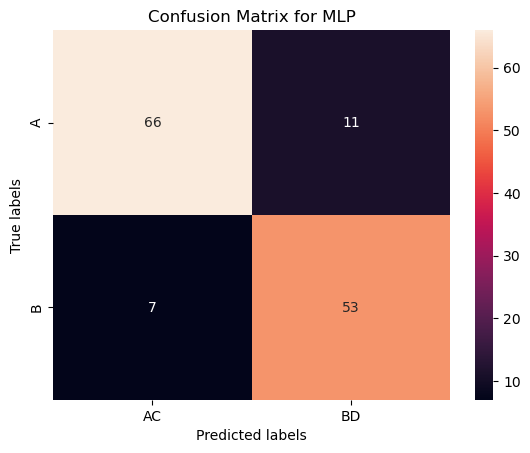

In [26]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

unique, counts = np.unique(a, return_counts=True)
print(unique)
print(counts)


ax= plt.subplot()
sns.heatmap(m1, annot=True, fmt='g', ax=ax); 
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix for MLP'); 
ax.xaxis.set_ticklabels(['AC', 'BD']); ax.yaxis.set_ticklabels(['A', 'B']);

[0. 1.]
[77 60]


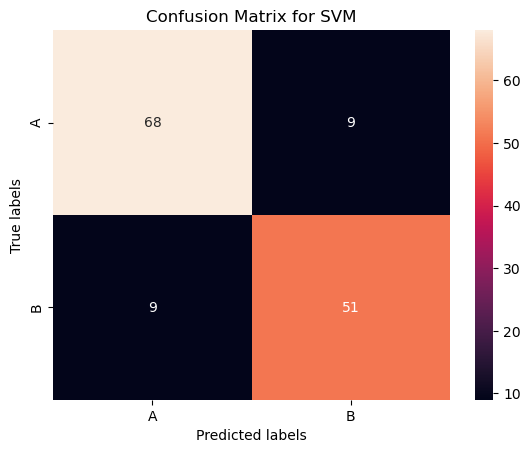

In [27]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

unique, counts = np.unique(b, return_counts=True)
print(unique)
print(counts)

ax= plt.subplot()
sns.heatmap(m2, annot=True, fmt='g', ax=ax); 
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix for SVM'); 
ax.xaxis.set_ticklabels(['A', 'B']); ax.yaxis.set_ticklabels(['A', 'B']);

[0. 1.]
[94 43]


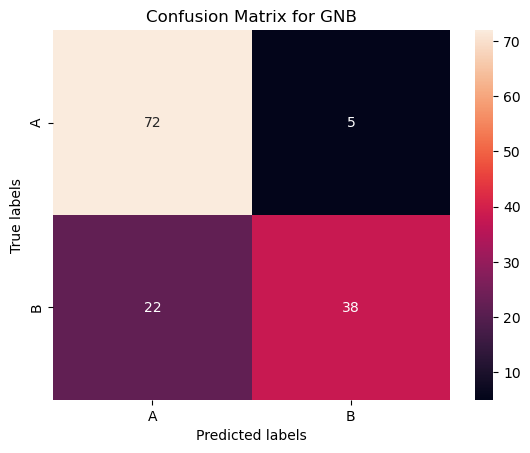

In [28]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

unique, counts = np.unique(c, return_counts=True)
print(unique)
print(counts)

ax= plt.subplot()
sns.heatmap(m3, annot=True, fmt='g', ax=ax); 
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix for GNB'); 
ax.xaxis.set_ticklabels(['A', 'B']); ax.yaxis.set_ticklabels(['A', 'B']);

[0. 1.]
[91 46]


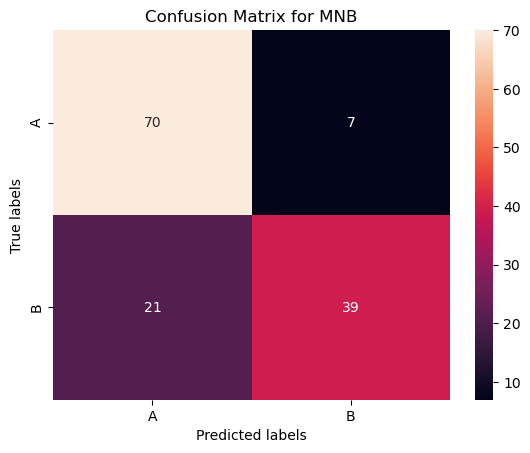

In [30]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

unique, counts = np.unique(d, return_counts=True)
print(unique)
print(counts)

ax= plt.subplot()
sns.heatmap(m4, annot=True, fmt='g', ax=ax); 
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix for MNB'); 
ax.xaxis.set_ticklabels(['A', 'B']); ax.yaxis.set_ticklabels(['A', 'B']);

[0. 1.]
[70 67]


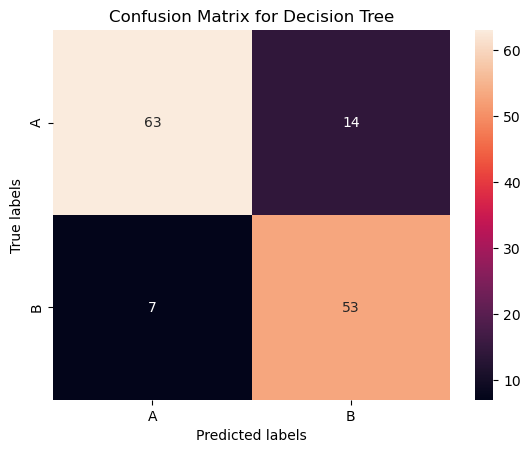

In [31]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

unique, counts = np.unique(e, return_counts=True)
print(unique)
print(counts)


ax= plt.subplot()
sns.heatmap(m5, annot=True, fmt='g', ax=ax); 
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix for Decision Tree'); 
ax.xaxis.set_ticklabels(['A', 'B']); ax.yaxis.set_ticklabels(['A', 'B']);

[0. 1.]
[74 63]


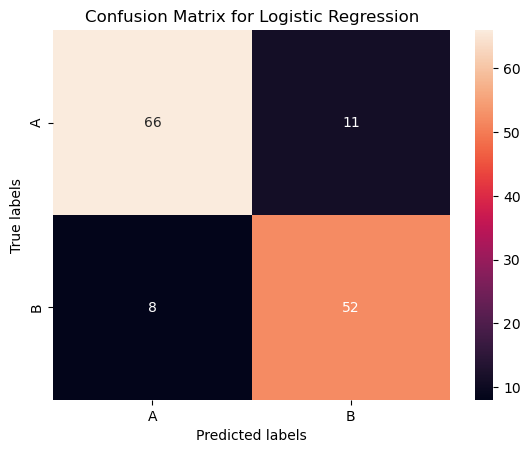

In [32]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

unique, counts = np.unique(f, return_counts=True)
print(unique)
print(counts)


ax= plt.subplot()
sns.heatmap(m6, annot=True, fmt='g', ax=ax); 
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix for Logistic Regression'); 
ax.xaxis.set_ticklabels(['A', 'B']); ax.yaxis.set_ticklabels(['A', 'B']);

[0. 1.]
[76 61]


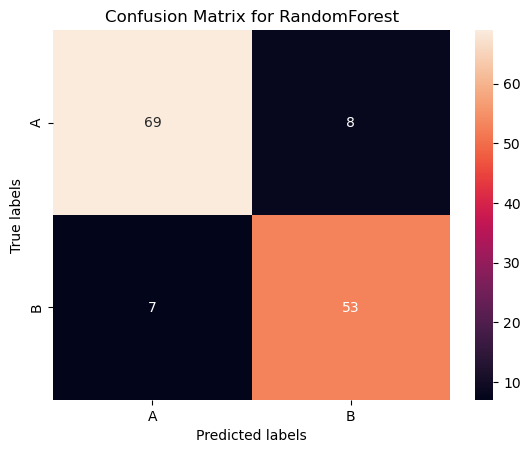

In [33]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

unique, counts = np.unique(g, return_counts=True)
print(unique)
print(counts)


ax= plt.subplot()
sns.heatmap(m7, annot=True, fmt='g', ax=ax); 
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix for RandomForest'); 
ax.xaxis.set_ticklabels(['A', 'B']); ax.yaxis.set_ticklabels(['A', 'B']);

[0. 1.]
[76 61]


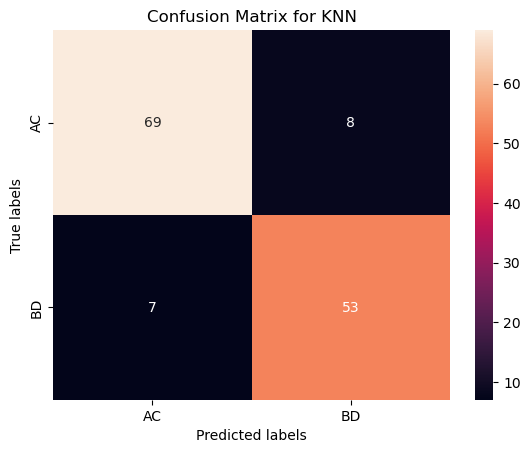

In [34]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

unique, counts = np.unique(h, return_counts=True)
print(unique)
print(counts)


ax= plt.subplot()
sns.heatmap(m8, annot=True, fmt='g', ax=ax); 
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix for KNN'); 
ax.xaxis.set_ticklabels(['AC', 'BD']); ax.yaxis.set_ticklabels(['AC', 'BD']);